Project name ::Medical Cost Personal Insurance Project

Problem Statement 
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [20]:
# Import the all lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [8]:
df= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.shape


(1338, 7)

In [12]:
# more informaton
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

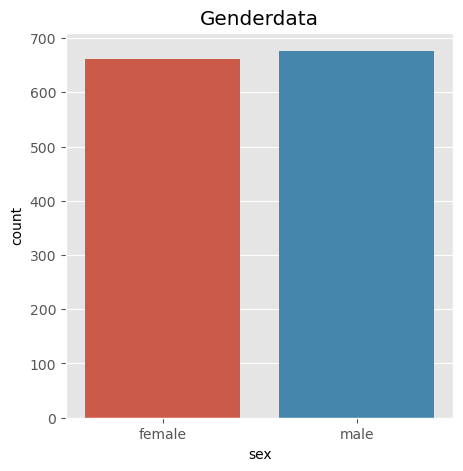

In [22]:
# plot the different grap according to col to see the level
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data = df)
plt.title('Genderdata')
plt.show()

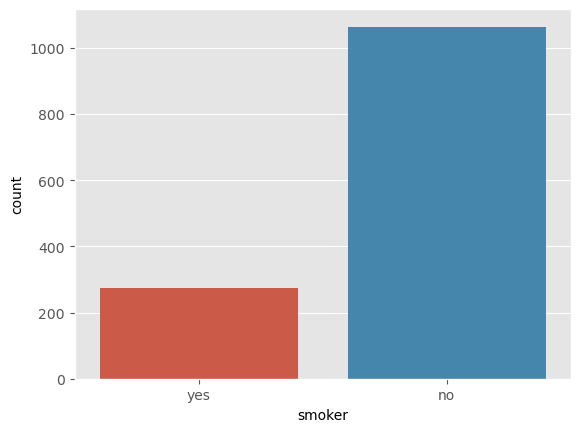

In [24]:
sns.countplot(x='smoker',data =df)
plt.show()

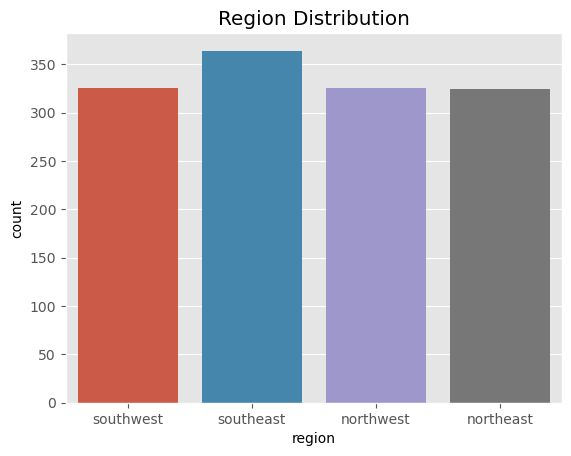

In [25]:
#Check region wise distrubution data
sns.countplot(x='region',data =df)
plt.title("Region Distribution")
plt.show()

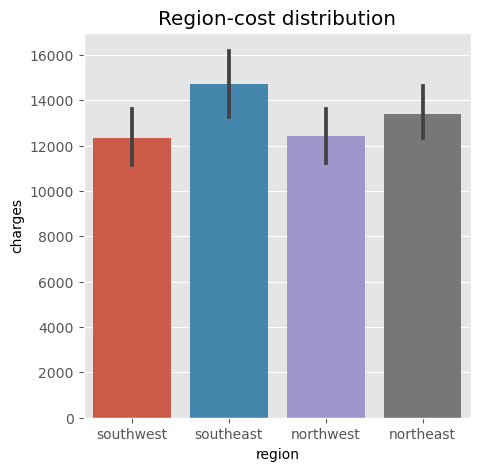

In [26]:
# charges is the comman and main col to distrubute the data So will calculate the distribution according to region
plt.figure(figsize = (5,5))
sns.barplot(x= 'region', y = 'charges',data =df)
plt.title('Region-cost distribution')
plt.show()
# Observation gettting more records on southeast and northeast according to charges

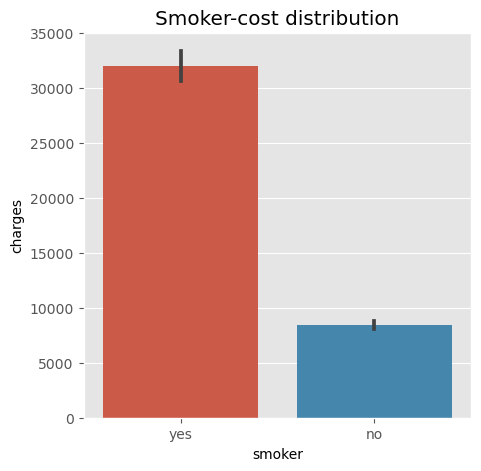

In [27]:
# Medical chages for Smokers
plt.figure(figsize = (5,5))
sns.barplot(x= 'smoker', y = 'charges',data =df)
plt.title('Smoker-cost distribution')
plt.show()
# Observation smoker having cost high

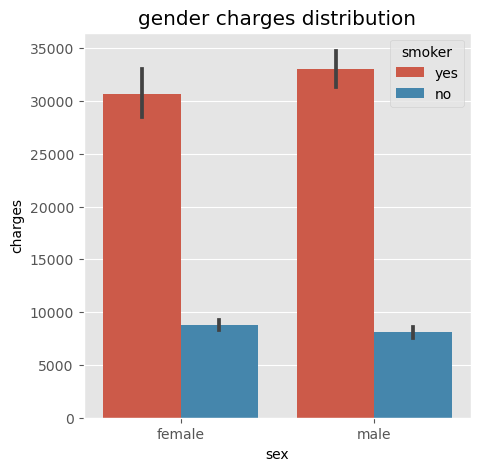

In [32]:
# Medical charges according to gender
plt.figure(figsize=(5,5)) 
sns.barplot(x= 'sex', y= 'charges',hue='smoker', data = df)
plt.title("gender charges distribution")
plt.show()
# observation  male having more cost to pay

Text(0, 0.5, 'Count')

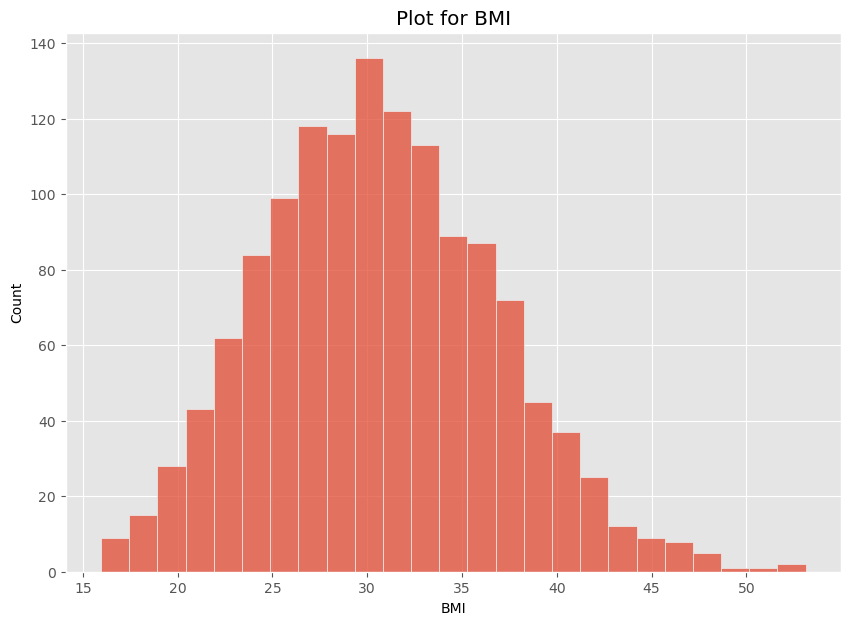

In [37]:
plt.figure(figsize=(10,7))
sns.histplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

<Axes: xlabel='region', ylabel='charges'>

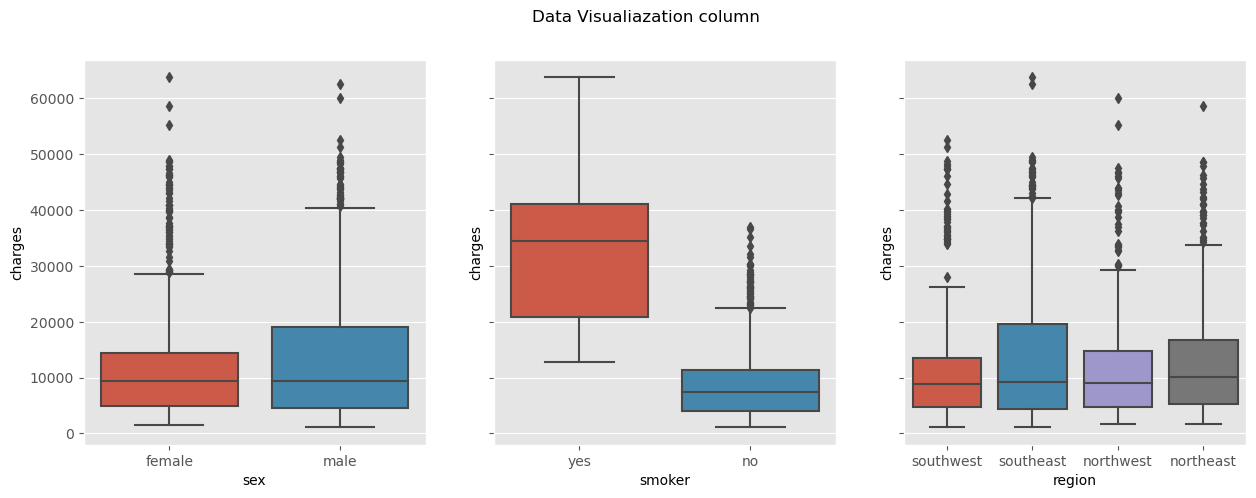

In [39]:
# Showinng subplot with the given column
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle("Data Visualiazation column")
sns.boxplot(x='sex',y='charges',data=df,ax=axes[0])
sns.boxplot(x='smoker',y='charges',data=df,ax=axes[1])
sns.boxplot(x='region',y='charges',data=df,ax=axes[2])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

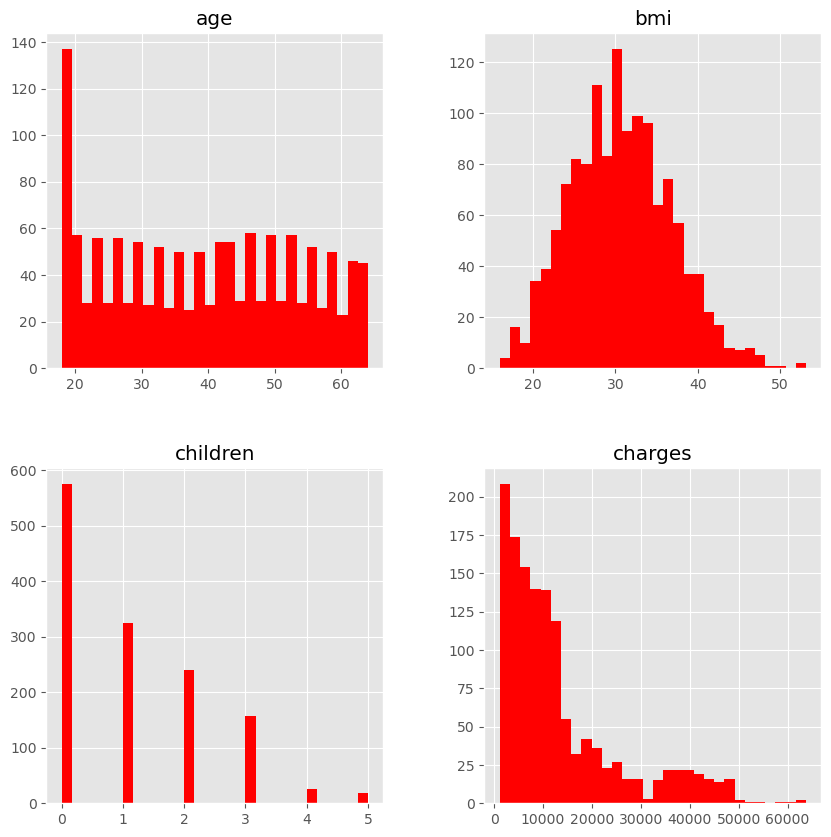

In [42]:
df[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='red')

In [45]:
# convert the data in Numerical form from categorical
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df = df.copy()
df.replace(clean_data, inplace=True)

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [47]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

In [50]:
X=df.drop(['charges','sex'],axis=1)
y=df.charges


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)
print ("Xtrain shape =",X_train.shape )
print ("X_test shape =",X_test.shape )
print ("Ytrain shape =",y_train.shape )
print ("Y test shape =",y_test.shape )

Xtrain shape = (936, 5)
X_test shape = (402, 5)
Ytrain shape = (936,)
Y test shape = (402,)


In [64]:
# show the linear regression model
linreg= LinearRegression()

In [65]:
# fit x and y train data in to linreg
linreg.fit(X_train,y_train)
pred1= linreg.predict(X_test)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix


In [67]:
print("r2_score=",(r2_score(y_test,pred1)))


r2_score= 0.7695459725681215


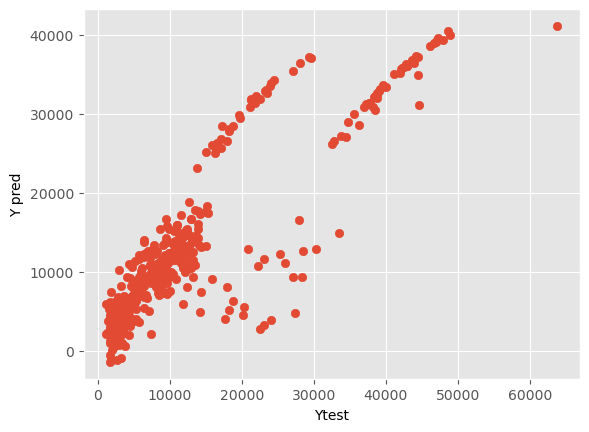

In [72]:
#create the plot to understand pred
plt.scatter(y_test,pred1)
plt.xlabel('Ytest')
plt.ylabel('Y pred')
plt.show()